In this task, the ego-vehicle is driving on a multilane highway populated with other vehicles. The agent’s objective is to reach a high speed while avoiding collisions with neighbouring vehicles. Driving on the right side of the road is also rewarded.



In [21]:
from IPython.display import clear_output

In [22]:
# Install environment and agent test
!pip install highway-env
!pip install tabulate
!pip install moviepy -U
!pip install imageio_ffmpeg
!pip install pyvirtualdisplay
!pip install git+https://github.com/eleurent/rl-agents#egg=rl-agents

!apt-get install -y xvfb ffmpeg

!git clone https://github.com/Farama-Foundation/HighwayEnv.git 2> /dev/null
!cp /content/HighwayEnv/scripts/utils.py /content/HighwayEnv/scripts/video_utils.py
import sys
sys.path.append('/content/HighwayEnv/scripts/')

clear_output()

In [23]:
# Environment
import gymnasium as gym
import highway_env

# Agent
from rl_agents.agents.common.factory import agent_factory
from video_utils import record_videos, show_videos

In [24]:
import warnings

# Suppress the specific warning message
warnings.filterwarnings("ignore", category=UserWarning, message=".*env.action_type to get variables from other wrappers is deprecated.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*env.configure.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*Overwriting existing videos.*")

https://highway-env.farama.org/observations/

In [25]:
from matplotlib import pyplot as plt

config = {
    "observation": {
        "type": "Kinematics",
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "absolute": True,
        "order": "sorted",
        "vehicles_count": 5, # max number of observable vehicles
        "normalize": False
    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "lanes_count": 5,
    "vehicles_count": 10, # max number of existing vehicles
    "duration": 40,  # [s]
    "initial_spacing": 2,
    "collision_reward": -1,  # The reward received when colliding with a vehicle.
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD].
    "simulation_frequency": 15,  # [Hz]
    "policy_frequency": 1,  # [Hz]
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 1200,  # [px]
    "screen_height": 250,  # [px]
    "centering_position": [0.1, 0.5],
    "scaling": 5.5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}
env = gym.make('highway-v0', render_mode='rgb_array')
env = record_videos(env)
env.configure(config)
obs, info = env.reset(seed = 666)

In [26]:
from tabulate import tabulate

features = ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"]
print(tabulate(obs, headers = features, tablefmt="grid"))

+------------+---------+-----+---------+------+---------+---------+
|   presence |       x |   y |      vx |   vy |   cos_h |   sin_h |
+============+=========+=====+=========+======+=========+=========+
|          1 | 158.837 |  16 | 25      |    0 |       1 |       0 |
+------------+---------+-----+---------+------+---------+---------+
|          1 | 177.794 |  12 | 22.6266 |    0 |       1 |       0 |
+------------+---------+-----+---------+------+---------+---------+
|          1 | 195.794 |  16 | 21.952  |    0 |       1 |       0 |
+------------+---------+-----+---------+------+---------+---------+
|          1 | 213.52  |   4 | 23.1025 |    0 |       1 |       0 |
+------------+---------+-----+---------+------+---------+---------+
|          1 | 233.362 |   0 | 23.5173 |    0 |       1 |       0 |
+------------+---------+-----+---------+------+---------+---------+


Stiamo usando "kinematics observation" e la prima riga rappresenta lo stato della macchina verde

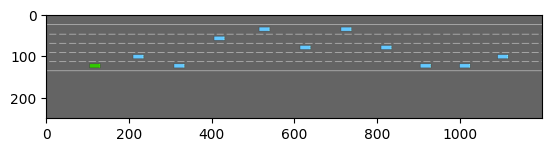

In [27]:
from matplotlib import pyplot as plt

plt.imshow(env.render())
plt.show()

In [28]:
done = False
truncated = False
# Make agent
agent_config = {
    "__class__": "<class 'rl_agents.agents.tree_search.deterministic.DeterministicPlannerAgent'>",
    "env_preprocessors": [{"method":"simplify"}],
    "budget": 50,
    "gamma": 0.7,
}
agent = agent_factory(env, agent_config)

while (not done and not truncated):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)

env.close()
show_videos()

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
